In [28]:
import os
import geopandas as gpd
import becmodel
from becmodel.config import config

# load and process default (test) data
data = becmodel.load()
data.keys()

dict_keys(['elevation', 'becmaster', 'rulepolys', 'bounds', 'slope', 'aspect', 'aspect_class', 'dem', 'rules_image', 'becvalue_image', 'becvalue_filtered', 'becvalue_labels', 'mask', 'becvalue_cleaned'])

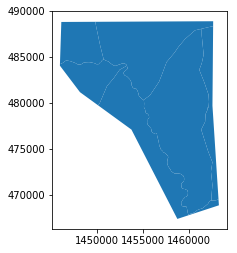

In [29]:
# view rules polygons
data["rulepolys"].plot()

In [30]:
# view elevation table
data["elevation"].head()

,becvalue,beclabel,class_name,cool_low,cool_high,neutral_low,neutral_high,warm_low,warm_high,zone,subzone,variant,phase,polygon_number
0,9,MS xk 1,Upper,1400,10000,1425,10000,1450,10000,MS,xk,1.0,NaN,301
1,4,IDF xh 1,Moderate,875,1400,925,1425,950,1450,IDF,xh,1.0,NaN,301
2,5,PP xh 1,Low,525,875,525,925,525,950,PP,xh,1.0,NaN,301
3,1,BG xh 1,Bottom,0,525,0,525,0,525,BG,xh,1.0,NaN,301
4,2,ESSFxcp,parkland,2100,10000,2100,10000,2125,10000,ESSF,xcp,NaN,NaN,302


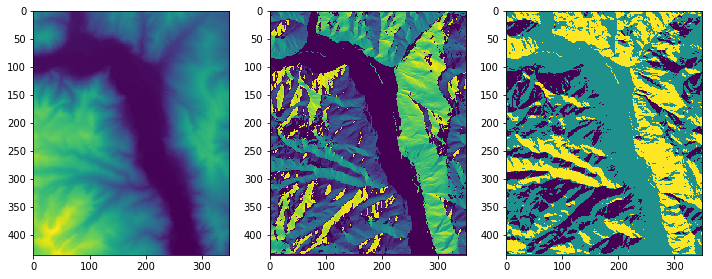

In [31]:
# view DEM / aspect / aspect class
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

fig, axes = plt.subplots(1, 3, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(data["dem"])
ax[1].imshow(data["aspect"])
ax[2].imshow(data["aspect_class"])

fig.tight_layout()
plt.show()

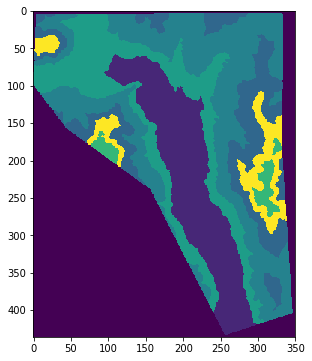

In [32]:
# plot output raster
fig, ax = plt.subplots(figsize=(8,6))
plt.imshow(data["becvalue_cleaned"])

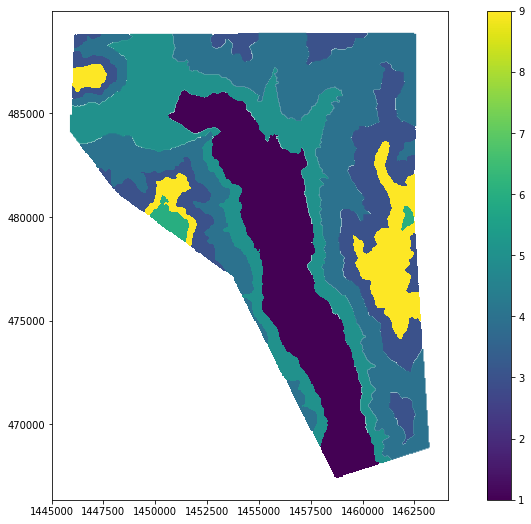

In [33]:
# write output and load from disk
becmodel.write(data)

gdf = gpd.read_file(
    os.path.join(config["wksp"], config["out_file"]), 
    layer=config["out_layer"]
)

# don't show 0 values
gdf = gdf[gdf.becvalue > 0]

# plot
fig, ax = plt.subplots(figsize = (14,9))
gdf.plot(
    column='becvalue', 
    cmap='viridis', 
    ax=ax, 
    legend=True
)